<a href="https://colab.research.google.com/github/samilarinc/crypto_prediction/blob/master/Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy import signal
import pandas_datareader as web
import datetime as dt

import sklearn.model_selection

import random

In [2]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 11.3 MB 5.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.3 which is incompatible.


     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

In [4]:
data.keys()

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
length = len(data['High'])

In [6]:
my_arr = list()
for i in range(length):
    my_arr.append(i)

In [7]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,3.627890e+07,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,3.009660e+07,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,3.963380e+07,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,3.847750e+07,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991,3.452260e+07,431.959991
...,...,...,...,...,...,...
2021-09-30,48436.011719,43320.023438,43816.742188,48116.941406,4.285064e+10,48116.941406
2021-10-01,48282.062500,47465.496094,48137.468750,47711.488281,3.061435e+10,47711.488281
2021-10-02,49130.691406,47157.289062,47680.027344,48199.953125,2.663812e+10,48199.953125


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.index = my_arr
dictdata = data.to_dict()
highs = list(dictdata['High'].values())
lows = list(dictdata['Low'].values())
opens = list(dictdata['Open'].values())
closes = list(dictdata['Close'].values())
volumes = list(dictdata['Volume'].values())
adjs = list(dictdata['Adj Close'].values())
lists = [highs, lows, opens, closes, volumes, adjs]

In [10]:
prev_days = 60

In [11]:
data

,High,Low,Open,Close,Volume,Adj Close
0,436.246002,427.515015,430.721008,434.334015,3.627890e+07,434.334015
1,436.062012,431.869995,434.622009,433.437988,3.009660e+07,433.437988
2,433.743011,424.705994,433.578003,430.010986,3.963380e+07,430.010986
3,434.516998,429.084015,430.061005,433.091003,3.847750e+07,433.091003
4,434.182007,429.675995,433.069000,431.959991,3.452260e+07,431.959991
...,...,...,...,...,...,...
2096,48436.011719,43320.023438,43816.742188,48116.941406,4.285064e+10,48116.941406
2097,48282.062500,47465.496094,48137.468750,47711.488281,3.061435e+10,47711.488281
2098,49130.691406,47157.289062,47680.027344,48199.953125,2.663812e+10,48199.953125
2099,49456.777344,47045.003906,48208.906250,49112.902344,3.338317e+10,49112.902344


In [12]:
train_high = [] 
train_low = []
train_open = []
train_close = []
train_volume = []
train_adj = []

out_high = []
out_low = []
out_open = []
out_close = []
out_volume = []
out_adj = []

i = 0

In [13]:
while i+prev_days < length:
    train_high.append(highs[i:i+prev_days])
    out_high.append(highs[i+prev_days])

    train_low.append(lows[i:i+prev_days])
    out_low.append(lows[i+prev_days])

    train_open.append(opens[i:i+prev_days])
    out_open.append(opens[i+prev_days])

    train_close.append(closes[i:i+prev_days])
    out_close.append(closes[i+prev_days])

    train_volume.append(volumes[i:i+prev_days])
    out_volume.append(volumes[i+prev_days])

    train_adj.append(adjs[i:i+prev_days])
    out_adj.append(adjs[i+prev_days])

    i += 1

In [14]:
train_lists = [train_high, train_low, train_open, train_close, train_volume, train_adj]
out_lists = [out_high, out_low, out_open, out_close, out_volume, out_adj] 

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

alpha = 0.95
regressor = GradientBoostingRegressor(loss='ls', alpha=alpha,
                                n_estimators=750, max_depth=6,
                                learning_rate=0.15)

In [16]:
single_train_list = []
for i in range(length-prev_days):
    single_train_list.append(train_lists[0][i])
    single_train_list[i].extend(train_lists[1][i])
    single_train_list[i].extend(train_lists[2][i])
    single_train_list[i].extend(train_lists[3][i])
    single_train_list[i].extend(train_lists[4][i])
    single_train_list[i].extend(train_lists[5][i])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_x, test_x, train_y, test_y = train_test_split(single_train_list[:-1], out_close[1:], random_state = 42)

In [19]:
regressor.fit(train_x, train_y)

GradientBoostingRegressor(alpha=0.95, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=750,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
regressor.score(test_x, test_y)

0.9952532210123574

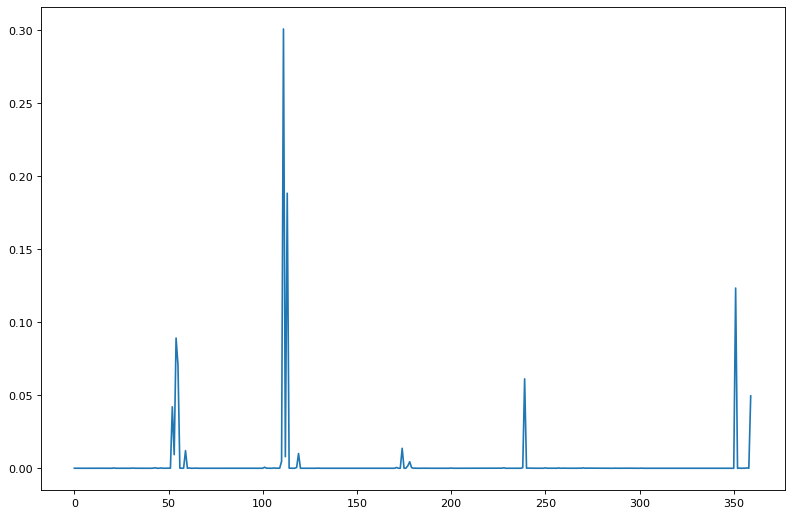

In [21]:
import matplotlib.pyplot
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
plt.plot(regressor.feature_importances_)

In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, regressor.predict(test_x))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 941778.2236


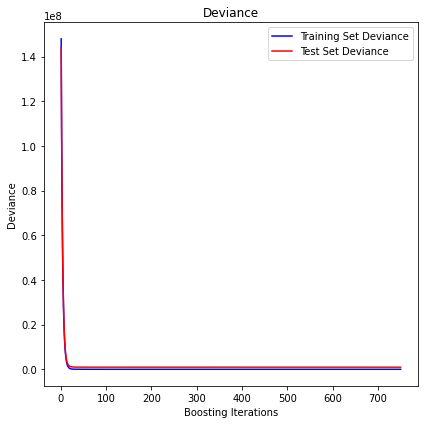

In [28]:
params = {'loss':'ls', 
          'alpha':alpha,
          'n_estimators':750,
          'max_depth':6,
          'learning_rate':0.15}

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(regressor.staged_predict(test_x)):
    test_score[i] = regressor.loss_(test_y, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, regressor.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [27]:
regressor.predict(np.array(single_train_list[-1]).reshape(1, -1))

array([49029.6529396])

In [25]:
out_close[-1]

49786.69140625

In [31]:
import pickle 
with open('dump.pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [32]:
from sklearn.externals import joblib
regressor = joblib.load('dump.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
